Problem 1

1)

In [1]:
import tensorflow as tf
tf.random.set_seed(42)

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist


In [4]:
y_train_full.shape

(60000,)

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
X_train, y_train = X_train_full[:50000], y_train_full[:50000]
X_valid, y_valid = X_train_full[50000:], y_train_full[50000:]

In [8]:
X_train.shape,X_valid.shape

((50000, 28, 28), (10000, 28, 28))

In [9]:
for i in range(len(X_train.shape)):
    print(f"X_train.shape[{i}]-{X_train.shape[i]}")

X_train.shape[0]-50000
X_train.shape[1]-28
X_train.shape[2]-28


We load the Mnist dataset and split the data in training and testing and we use the last 10000 features of training as validation set

2)

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [14]:
train=pd.DataFrame(y_train).value_counts()
test=pd.DataFrame(y_test).value_counts()
valid=pd.DataFrame(y_valid).value_counts()

In [15]:
print(train)

7    5045
8    5032
6    5030
1    5012
5    5004
2    4992
3    4979
9    4979
0    4977
4    4950
Name: count, dtype: int64


In [16]:
classes = pd.DataFrame({ "Class": class_names, "Training": train, "Validation": valid, "Test": test})

In [17]:
classes

,Class,Training,Validation,Test
0,,,,
0,T-shirt/top,4977,1023,1000
1,Trouser,5012,988,1000
2,Pullover,4992,1008,1000
3,Dress,4979,1021,1000
4,Coat,4950,1050,1000
5,Sandal,5004,996,1000
6,Shirt,5030,970,1000
7,Sneaker,5045,955,1000
8,Bag,5032,968,1000


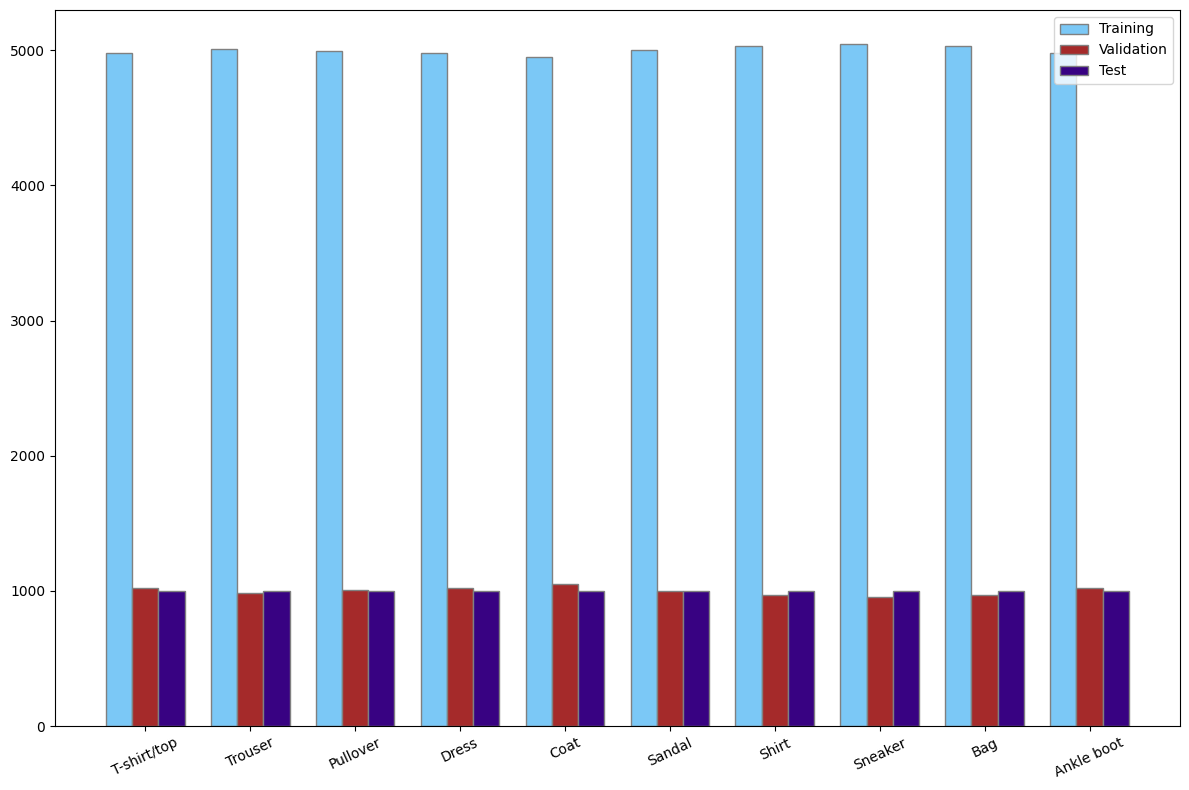

In [18]:
plt.figure(figsize=(12,8))
x = range(len(classes["Class"]))
plt.bar(x,classes["Training"],color ='#7BC8F6', width = 0.25, 
        edgecolor ='grey',label="Training") 

plt.bar([i + 0.25 for i in x],classes["Validation"], color ='#A52A2A', width = 0.25, 
        edgecolor ='grey',label="Validation") 
plt.bar([i + 0.5 for i in x],classes["Test"],  color ='#380282', width = 0.25, 
       edgecolor ='grey',label="Test") 
plt.rc('xtick', labelsize=10)
plt.xticks([i + 0.25 for i in x], classes["Class"],rotation=25)
plt.legend(loc="upper right")

plt.tight_layout()

plt.show()


We plot the Training/Validation/Test distribution per class/label.

In [19]:
classes.sort_values(by="Class")

,Class,Training,Validation,Test
0,,,,
9,Ankle boot,4979,1021,1000
8,Bag,5032,968,1000
4,Coat,4950,1050,1000
3,Dress,4979,1021,1000
2,Pullover,4992,1008,1000
5,Sandal,5004,996,1000
6,Shirt,5030,970,1000
7,Sneaker,5045,955,1000
0,T-shirt/top,4977,1023,1000


3)

In [20]:
train_min, train_max = X_train.min(), X_train.max()
val_min, val_max = X_valid.min(), X_valid.max()
test_min, test_max = X_test.min(), X_test.max()

In [21]:
print(f" The range in Training is {X_train.min()}-{X_train.max()}")
print(f" The range in Validation is {X_valid.min()}-{X_valid.max()}")
print(f" The range in Test is {X_test.min()}-{X_test.max()}")

 The range in Training is 0-255
 The range in Validation is 0-255
 The range in Test is 0-255


In [22]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255. #normalization

4)

In [23]:
import matplotlib.pyplot as plt

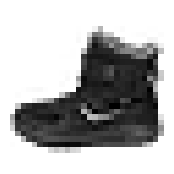

In [24]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [25]:
X_train.shape

(50000, 28, 28)

In [26]:
m=X_train.shape[1] // 2;m # the value to divide the picture in  two parts

14

In [27]:
X_train_upper = X_train[:, :m, :]
X_train_lower = X_train[:, m:, :]


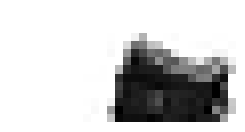

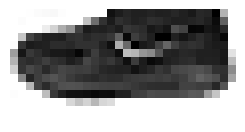

In [28]:
plt.subplot(121)
plt.imshow(X_train_upper[0], cmap="binary")
plt.axis('off')
plt.show()
plt.subplot(122)
plt.imshow(X_train_lower[0], cmap="binary")
plt.axis('off')
plt.show()

In [29]:
X_valid_upper = X_valid[:, :m, :]
X_valid_lower = X_valid[:, m:, :]

In [30]:
X_test_upper = X_test[:, :m, :]
X_test_lower = X_test[:, m:, :]

5)

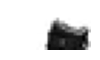

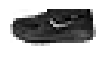

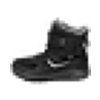

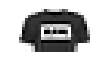

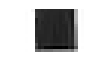

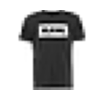

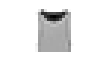

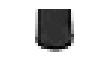

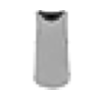

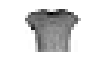

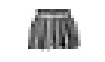

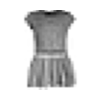

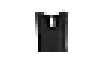

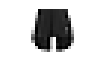

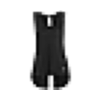

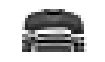

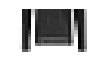

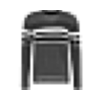

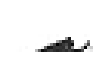

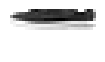

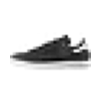

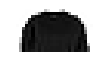

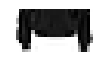

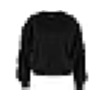

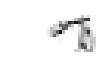

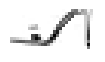

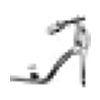

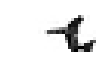

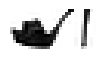

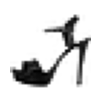

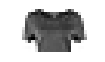

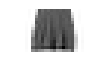

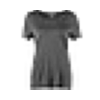

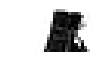

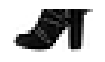

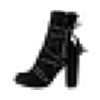

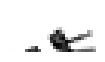

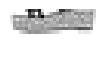

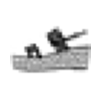

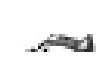

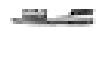

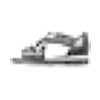

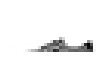

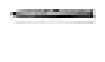

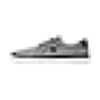

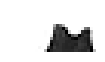

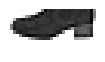

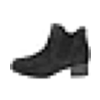

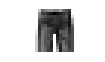

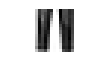

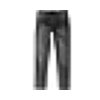

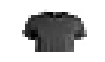

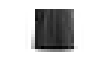

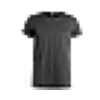

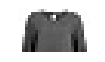

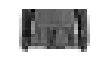

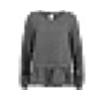

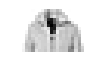

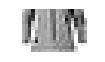

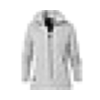

In [31]:
plt.figure(figsize=(5* 1.2, 4 * 1.2))
for i in range(20):
    plt.subplot(451)
    plt.imshow(X_train_upper[i], cmap="binary")
    plt.axis('off')
    plt.show()
    plt.subplot(452)
    plt.imshow(X_train_lower[i], cmap="binary")
    plt.axis('off')
    plt.show()
    plt.subplot(453)
    plt.imshow(X_train[i], cmap="binary")
    plt.axis('off')
    plt.show() 
   

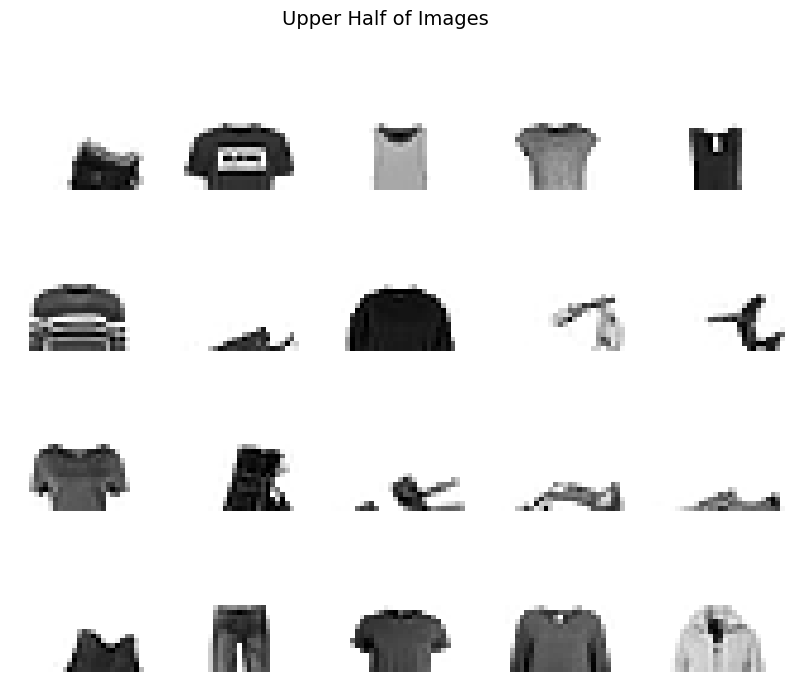

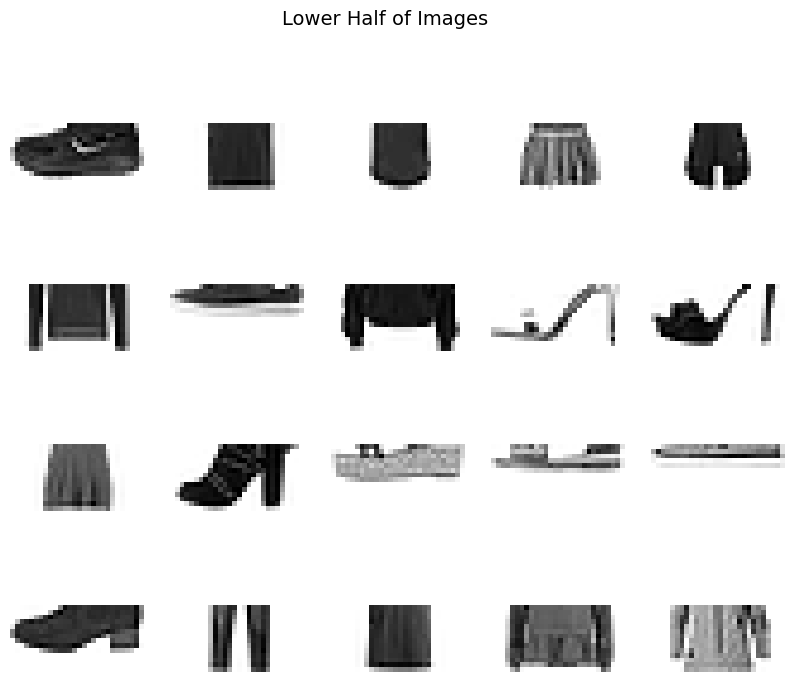

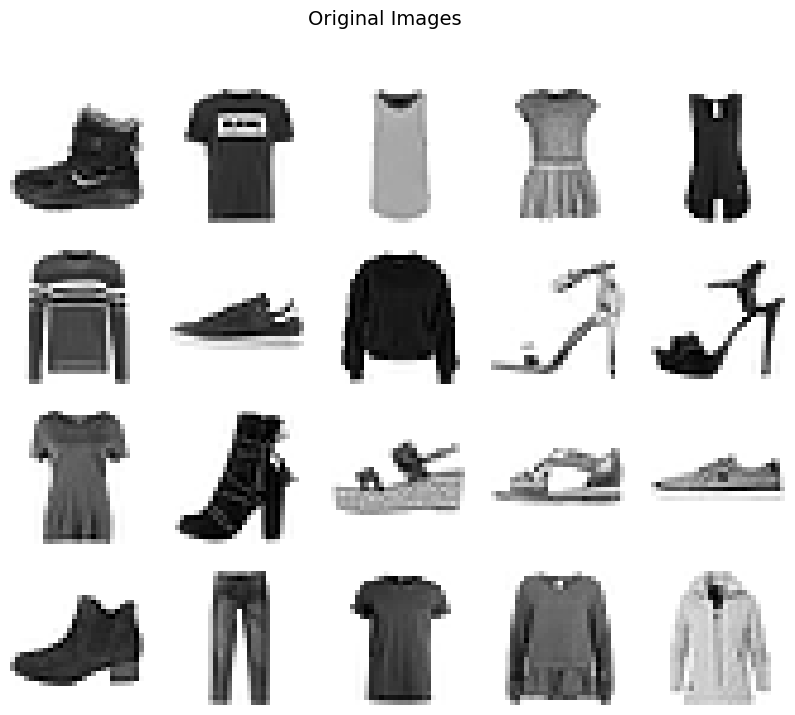

In [32]:
def plot_images(images, title):
    fig, axes = plt.subplots(4, 5, figsize=(10, 8))
    fig.suptitle(title, fontsize=14)
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap="binary")
        ax.axis("off")
    plt.show()

# Visualizing the first 20 instances
plot_images(X_train_upper[:20], "Upper Half of Images")
plot_images(X_train_lower[:20], "Lower Half of Images")
plot_images(X_train[:20], "Original Images")

6)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD


In [35]:

tf.random.set_seed(42)
model = Sequential([
    Flatten(input_shape=[28, 28]),  # Flatten the 28x28 images into a 1D vector with 784 features
    Dense(128, activation='relu'), 
    Dense(64, activation='relu'),   
    Dense(10, activation='softmax') # Output layer for multiclass classification (10 classes)
])

C:\Users\vagelis\anaconda3\envs\MLenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
model.compile(
    optimizer=SGD(learning_rate=0.0001),  
    loss='sparse_categorical_crossentropy',  # Loss function for multiclass classification
    metrics=['accuracy']  
)

In [37]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

7)

In [38]:
from sklearn.metrics import classification_report

In [39]:
tf.random.set_seed(42)
model2 = Sequential([
        Flatten(input_shape=(14, 28)),  # Adjusted input shape for cropped images
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')  
    ])


In [40]:
model2.compile(optimizer=SGD(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [41]:
weights = model2.get_weights() #store initial weights into a variable

In [42]:
# Train model on upper-half data 

model2.fit(X_train_upper, y_train, epochs=10, batch_size=32, validation_data=(X_valid_upper, y_valid))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1510 - loss: 2.3315 - val_accuracy: 0.2563 - val_loss: 2.1952
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2730 - loss: 2.1678 - val_accuracy: 0.3246 - val_loss: 2.0871
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3417 - loss: 2.0687 - val_accuracy: 0.3983 - val_loss: 2.0027
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4121 - loss: 1.9876 - val_accuracy: 0.4601 - val_loss: 1.9265
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4742 - loss: 1.9125 - val_accuracy: 0.5089 - val_loss: 1.8535
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5166 - loss: 1.8399 - val_accuracy: 0.5387 - val_loss: 1.7820
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5424 - loss: 1.7686 - val_accuracy: 0.5573 - val_loss: 1.7120
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5602 - loss: 1.6989 -

In [43]:
y_pred_upper = np.argmax(model2.predict(X_test_upper), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


In [44]:
y_pred_upper

array([9, 2, 1, ..., 0, 1, 7], dtype=int64)

In [45]:
report_upper = classification_report(y_test, y_pred_upper,output_dict=True)

In [46]:
model2.set_weights(weights) #reset weights into the initial weight

In [47]:
# Train model on lower-half data  
model2.fit(X_train_lower, y_train, epochs=10, batch_size=32, validation_data=(X_valid_lower, y_valid))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1592 - loss: 2.2773 - val_accuracy: 0.2196 - val_loss: 2.1658
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2345 - loss: 2.1392 - val_accuracy: 0.2956 - val_loss: 2.0599
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3179 - loss: 2.0390 - val_accuracy: 0.3835 - val_loss: 1.9682
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4006 - loss: 1.9506 - val_accuracy: 0.4574 - val_loss: 1.8844
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4710 - loss: 1.8687 - val_accuracy: 0.5093 - val_loss: 1.8049
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5161 - loss: 1.7903 - val_accuracy: 0.5380 - val_loss: 1.7283
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5399 - loss: 1.7146 - val_accuracy: 0.5505 - val_loss: 1.6550
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5526 - loss: 1.6424 - 

In [48]:
y_pred_lower = np.argmax(model2.predict(X_test_lower), axis=1) #the id-label of maximum

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


In [49]:
report_lower = classification_report(y_test, y_pred_lower,output_dict=True)

In [50]:
df_lower = pd.DataFrame(report_lower).transpose()

In [51]:
df_upper = pd.DataFrame(report_upper).transpose()

In [52]:
df_lower,df_upper

(              precision  recall  f1-score     support
 0              0.532609  0.7840  0.634304   1000.0000
 1              0.919767  0.7910  0.850538   1000.0000
 2              0.432258  0.5360  0.478571   1000.0000
 3              0.680655  0.6650  0.672736   1000.0000
 4              0.375000  0.2670  0.311916   1000.0000
 5              0.898990  0.0890  0.161965   1000.0000
 6              0.187500  0.1170  0.144089   1000.0000
 7              0.601187  0.9120  0.724672   1000.0000
 8              0.512019  0.6390  0.568505   1000.0000
 9              0.708233  0.8860  0.787206   1000.0000
 accuracy       0.568600  0.5686  0.568600      0.5686
 macro avg      0.584822  0.5686  0.533450  10000.0000
 weighted avg   0.584822  0.5686  0.533450  10000.0000,
               precision  recall  f1-score     support
 0              0.658537  0.6750  0.666667   1000.0000
 1              0.628494  0.9220  0.747467   1000.0000
 2              0.412602  0.6090  0.491922   1000.0000
 3       

In [53]:
df_report=df_lower.merge(df_upper,left_index=True,right_index=True)

In [54]:
df_report.columns=df_report.columns.str.replace("x","lower").str.replace("y","upper")

In [55]:
df_report #merged classification reports for lower and upper models for better visualization and comparison

,precision_lower,recall_lower,f1-score_lower,support_lower,precision_upper,recall_upper,f1-score_upper,support_upper
0,0.532609,0.7840,0.634304,1000.0000,0.658537,0.6750,0.666667,1000.0000
1,0.919767,0.7910,0.850538,1000.0000,0.628494,0.9220,0.747467,1000.0000
2,0.432258,0.5360,0.478571,1000.0000,0.412602,0.6090,0.491922,1000.0000
3,0.680655,0.6650,0.672736,1000.0000,0.686275,0.4900,0.571762,1000.0000
4,0.375000,0.2670,0.311916,1000.0000,0.413023,0.4440,0.427952,1000.0000
5,0.898990,0.0890,0.161965,1000.0000,0.788732,0.0560,0.104575,1000.0000
6,0.187500,0.1170,0.144089,1000.0000,0.268012,0.0930,0.138085,1000.0000
7,0.601187,0.9120,0.724672,1000.0000,0.599013,0.8500,0.702770,1000.0000
8,0.512019,0.6390,0.568505,1000.0000,0.855072,0.7670,0.808645,1000.0000
9,0.708233,0.8860,0.787206,1000.0000,0.634195,0.9570,0.762854,1000.0000


d1=df_report

In [ ]:
d1.reset_index(inplace=True) #reset index so we can use it for plotting

In [ ]:
d1["index"]=d1["index"].apply(lambda x:x[0:3]) #keep only the first 3 chars in index column

In [218]:
d1["precision_diff"]=abs(d1["precision_upper"]-d1["precision_lower"]) #calculate the differences in precision upper and lower

In [220]:
d1["recall_diff"]=abs(d1["recall_upper"]-d1["recall_lower"])

In [222]:
d1["f1_diff"]=abs(d1["f1-score_upper"]-d1["f1-score_lower"])

Text(0.5, 1.0, 'f1-score_diff')

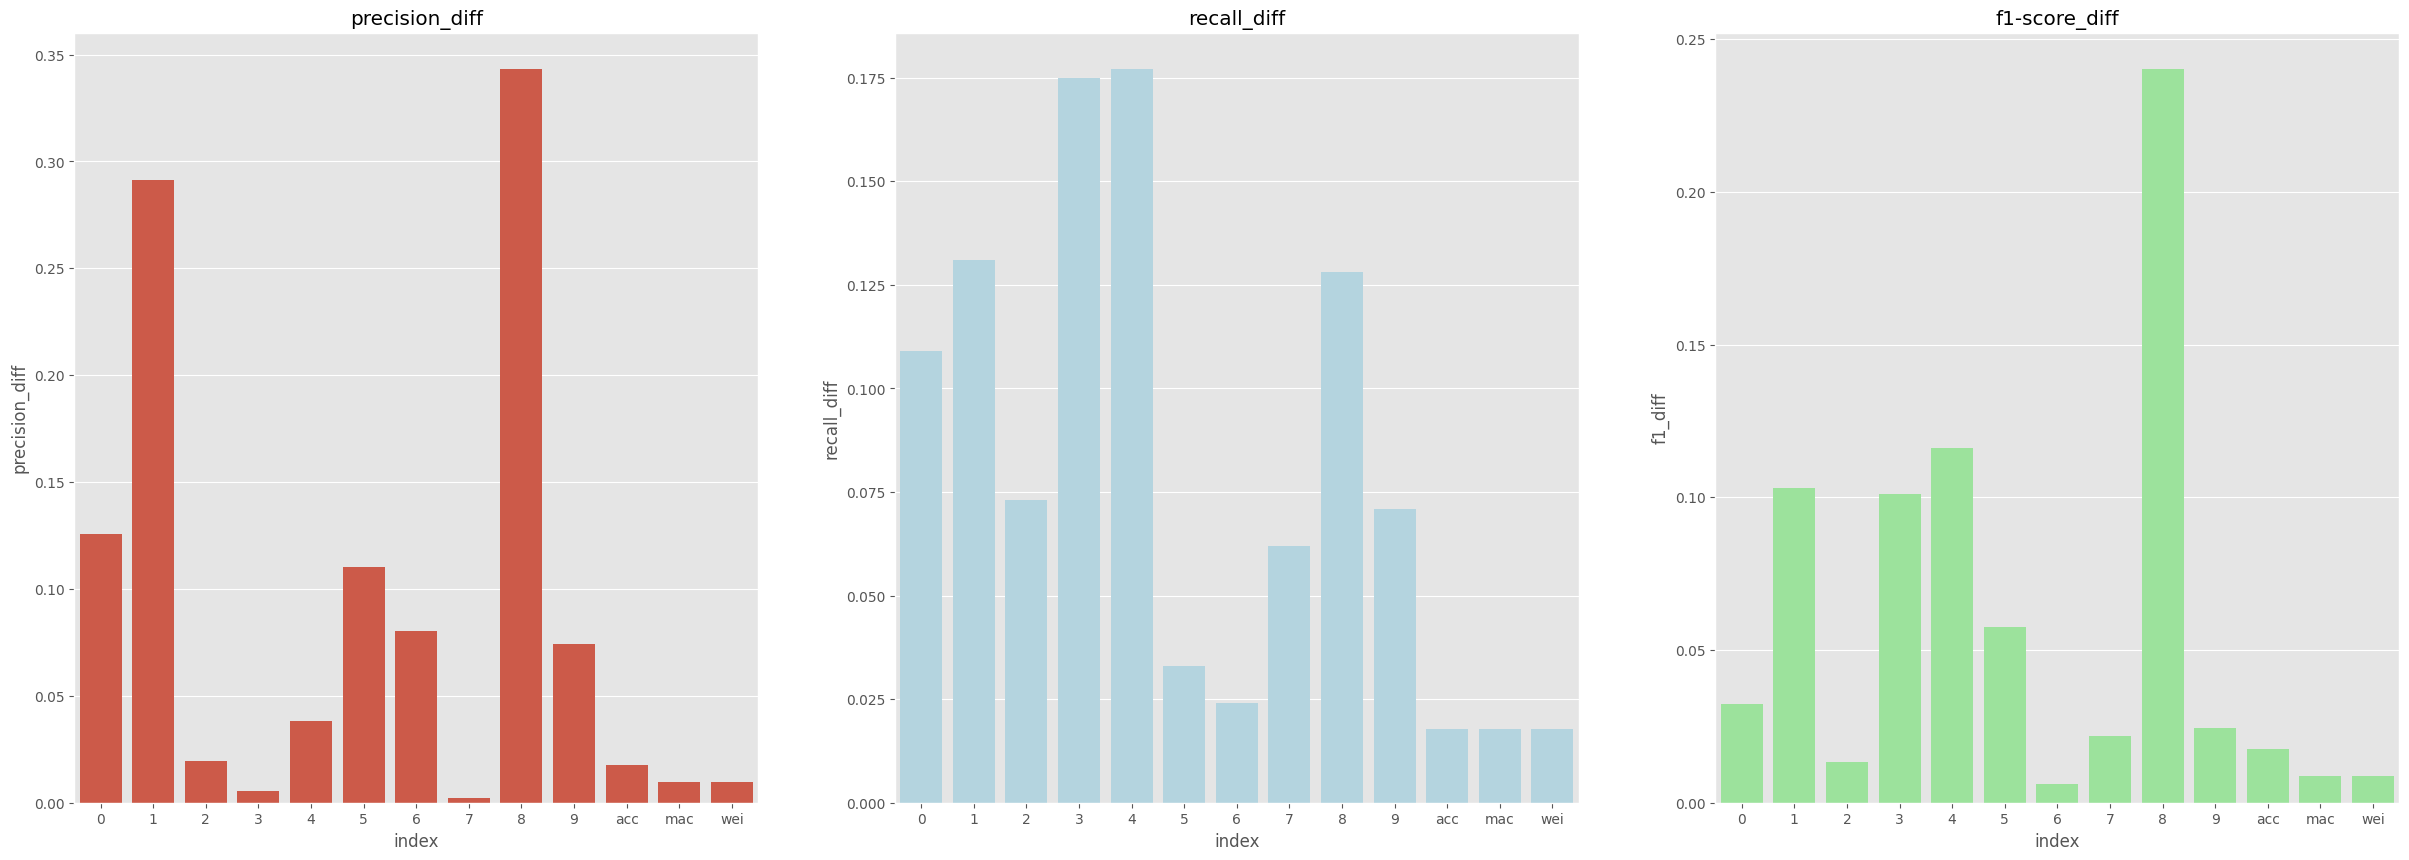

In [232]:
fig, axs = plt.subplots(1, 3)  #plot the differences
fig.set_size_inches(30, 10)
sns.barplot(data=d1,y="precision_diff",x="index",ax=axs[0])
axs[0].set_title('precision_diff')
sns.barplot(data=d1,y="recall_diff",x="index",ax=axs[1],color="lightblue")
axs[1].set_title('recall_diff')
sns.barplot(data=d1,y="f1_diff",x="index",ax=axs[2],color="lightgreen")
axs[2].set_title('f1-score_diff')

We can see that in precision the biggest differences between upper and lower is in 1st and 8th class,in recall in classes 3,4,8 and in f1_score the 8th class.

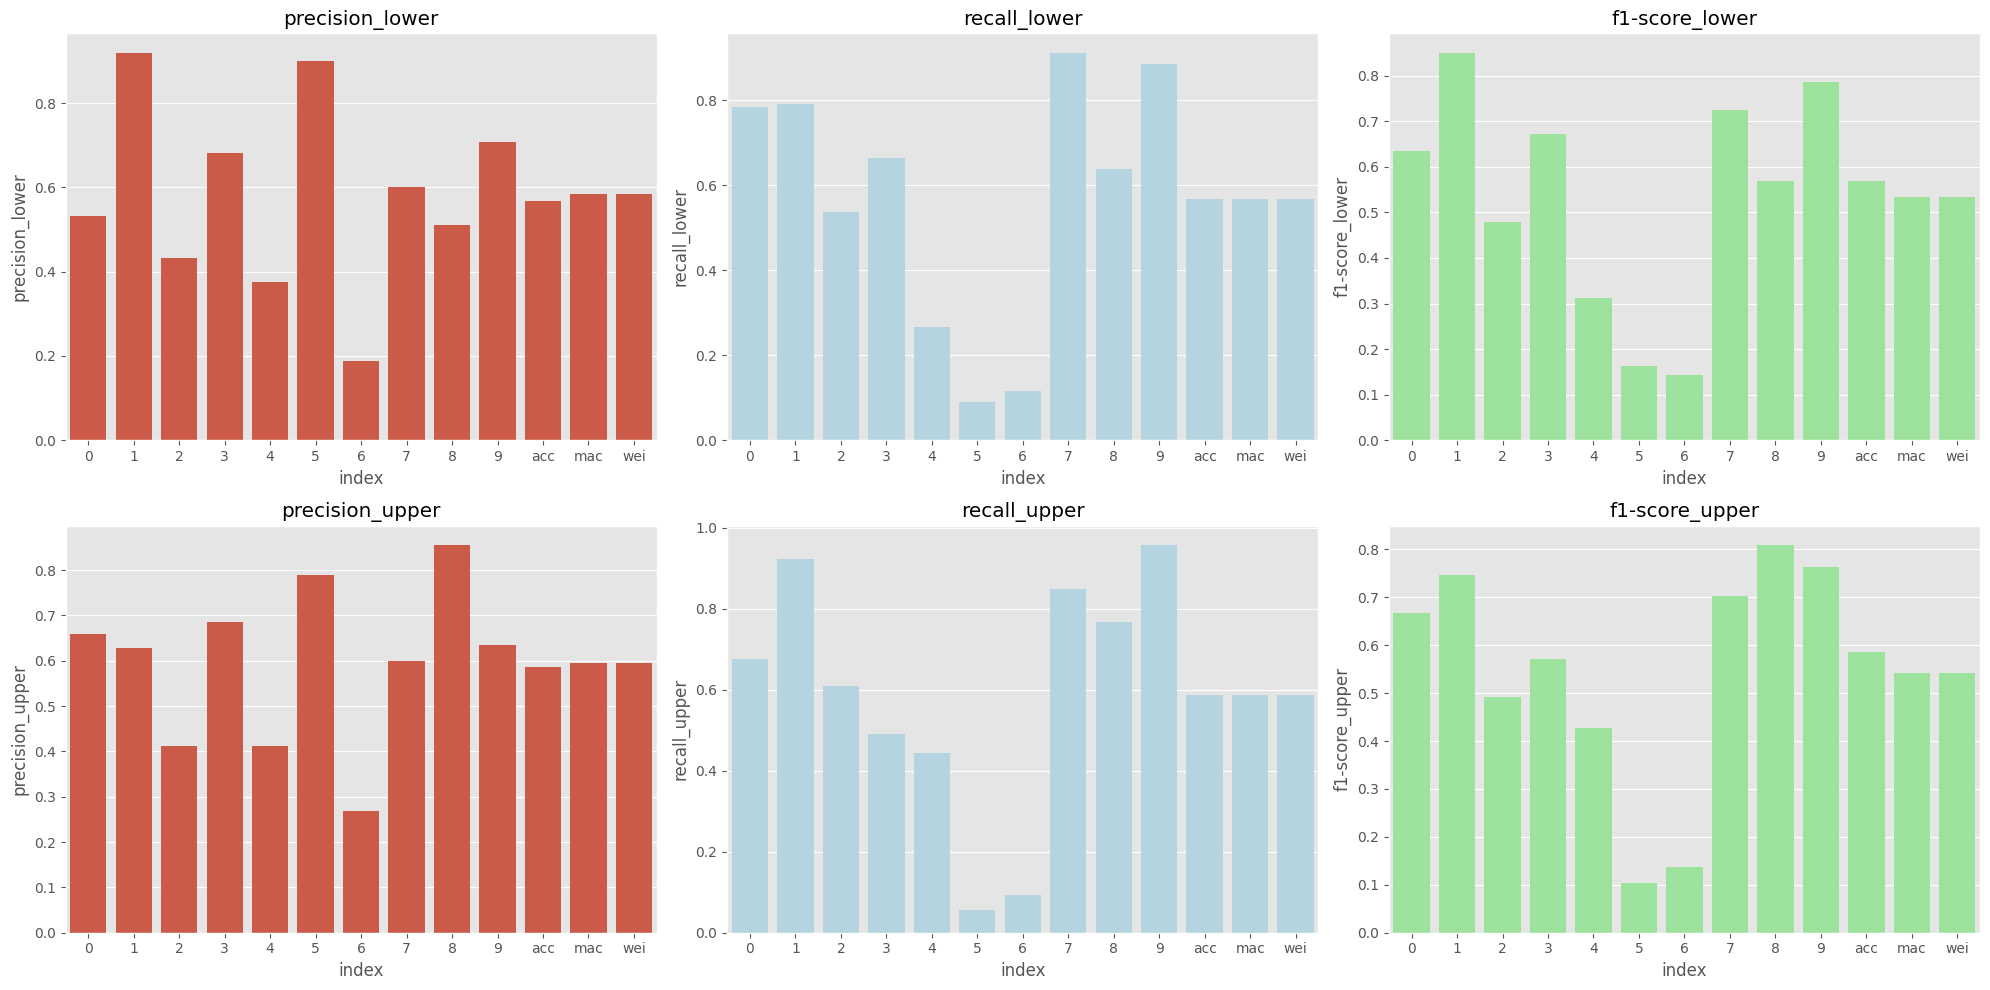

In [217]:
fig, axs = plt.subplots(2, 3) #plotting precision ,recall,f1_score per index
fig.set_size_inches(20, 10)
sns.barplot(data=d1,y="precision_lower",x="index",ax=axs[0,0])
axs[0, 0].set_title('precision_lower')
sns.barplot(data=d1,y="recall_lower",x="index",ax=axs[0,1],color="lightblue")
axs[0, 1].set_title('recall_lower')
sns.barplot(data=d1,y="f1-score_lower",x="index",ax=axs[0,2],color="lightgreen")
axs[0, 2].set_title('f1-score_lower')
sns.barplot(data=d1,y="precision_upper",x="index",ax=axs[1,0])
axs[1, 0].set_title('precision_upper')
sns.barplot(data=d1,y="recall_upper",x="index",ax=axs[1,1],color="lightblue")
axs[1, 1].set_title('recall_upper')
sns.barplot(data=d1,y="f1-score_upper",x="index",ax=axs[1,2],color="lightgreen")
axs[1, 2].set_title('f1-score_upper')
plt.tight_layout()

8)

In [56]:
#One model predicts correct class and the other the incorrect class 
correct_upper = (y_pred_upper == y_test) & (y_pred_lower != y_test) 
correct_lower = (y_pred_lower == y_test) & (y_pred_upper != y_test)

In [57]:
pd.DataFrame(correct_lower).value_counts()

False    8961
True     1039
Name: count, dtype: int64

In [59]:
pd.DataFrame(correct_upper).value_counts()

False    8784
True     1216
Name: count, dtype: int64

In [60]:
indices5_upper=np.where(correct_upper==True)[0][:5];indices5_upper

array([18, 45, 46, 47, 57], dtype=int64)

In [61]:
indices5_upper.shape

(5,)

In [62]:
indices5_lower=np.where(correct_lower==True)[0][:5];indices5_lower

array([12, 16, 27, 30, 33], dtype=int64)

In [63]:
for ind in indices5_upper:
    print(f"Actual {y_test[ind]}, Correct Prediction {y_pred_upper[ind]}, False Prediction {y_pred_lower[ind]}")

Actual 8, Correct Prediction 8, False Prediction 9
Actual 7, Correct Prediction 7, False Prediction 9
Actual 2, Correct Prediction 2, False Prediction 4
Actual 1, Correct Prediction 1, False Prediction 3
Actual 4, Correct Prediction 4, False Prediction 2


In [64]:
for ind in indices5_lower:
    print(f"Actual {y_test[ind]}, Correct Prediction {y_pred_lower[ind]}, False Prediction {y_pred_upper[ind]}")

Actual 7, Correct Prediction 7, False Prediction 8
Actual 2, Correct Prediction 2, False Prediction 0
Actual 0, Correct Prediction 0, False Prediction 1
Actual 8, Correct Prediction 8, False Prediction 7
Actual 3, Correct Prediction 3, False Prediction 4


Problem 2

1)

In [65]:
from tensorflow.keras.optimizers import Adam

In [66]:
model3 = Sequential([
        Flatten(input_shape=(14, 28)),  # Adjusted input shape for cropped images
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32,activation='relu'),
        Dense(10, activation='softmax')  
    ])

C:\Users\vagelis\anaconda3\envs\MLenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [67]:
model3.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [68]:
history=model3.fit(X_train_upper, y_train, epochs=15, batch_size=32, validation_data=(X_valid_upper, y_valid))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5317 - loss: 1.3678 - val_accuracy: 0.7686 - val_loss: 0.6529
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7812 - loss: 0.6185 - val_accuracy: 0.7924 - val_loss: 0.5765
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8000 - loss: 0.5550 - val_accuracy: 0.8018 - val_loss: 0.5470
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8096 - loss: 0.5250 - val_accuracy: 0.8070 - val_loss: 0.5293
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8145 - loss: 0.5045 - val_accuracy: 0.8116 - val_loss: 0.5147
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8199 - loss: 0.4883 - val_accuracy: 0.8152 - val_loss: 0.5037
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8247 - loss: 0.4749 - val_accuracy: 0.8189 - val_loss: 0.4947
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8286 - loss: 0.4635 

In [69]:
Evaluation = model3.evaluate(X_test_upper, y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.8238 - loss: 0.4824


In [70]:
model3_predictions=np.argmax(model3.predict(X_test_upper), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step   


In [71]:
cl_report_model3 = classification_report(y_test, model3_predictions,output_dict=True)

In [72]:
pd.DataFrame(cl_report_model3)

,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.791498,0.957230,0.696940,0.829746,0.711921,0.956567,0.556892,0.864545,0.951195,0.943436,0.8238,0.825997,0.825997
recall,0.782000,0.940000,0.706000,0.848000,0.645000,0.925000,0.602000,0.951000,0.955000,0.884000,0.8238,0.823800,0.823800
f1-score,0.786720,0.948537,0.701441,0.838773,0.676810,0.940519,0.578568,0.905714,0.953094,0.912752,0.8238,0.824293,0.824293
support,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.8238,10000.000000,10000.000000


In [73]:
history.params,history.epoch

({'verbose': 'auto', 'epochs': 15, 'steps': 1563},
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [74]:
plt.style.use("ggplot")


In [75]:
# Get best epoch (lowest validation loss)
best_epoch_base = np.argmin(history.history['val_loss'])

In [76]:
best_epoch_base

14

<Figure size 800x1000 with 0 Axes>

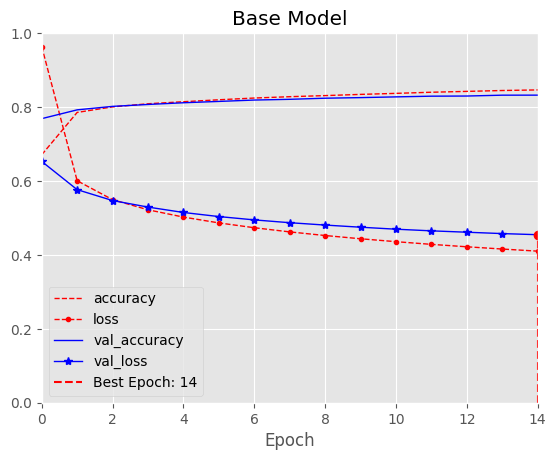

In [77]:
plt.figure(figsize=(8,10))
pd.DataFrame(history.history).plot( xlim=[0, 14], ylim=[0, 1], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"],linewidth=1)
plt.plot(best_epoch_base,min(history.history["val_loss"]),"ro")
plt.vlines(best_epoch_base,0,min(history.history['val_loss']), linestyle="--", color="red", label=f"Best Epoch: {best_epoch_base}",linewidth=1.5)
plt.legend(loc="lower left") 
plt.title("Base Model")
plt.show()

2)

In [78]:
from tensorflow.keras.callbacks import EarlyStopping

In [79]:
callback=EarlyStopping(patience=2,monitor="val_loss")

In [80]:
history1=model3.fit(X_train_upper, y_train, epochs=15, batch_size=32, validation_data=(X_valid_upper, y_valid),callbacks=[callback])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8475 - loss: 0.4067 - val_accuracy: 0.8340 - val_loss: 0.4515
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8490 - loss: 0.4018 - val_accuracy: 0.8340 - val_loss: 0.4499
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8506 - loss: 0.3971 - val_accuracy: 0.8351 - val_loss: 0.4471
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8529 - loss: 0.3926 - val_accuracy: 0.8358 - val_loss: 0.4449
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8546 - loss: 0.3885 - val_accuracy: 0.8368 - val_loss: 0.4432
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8559 - loss: 0.3844 - val_accuracy: 0.8372 - val_loss: 0.4414
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8568 - loss: 0.3805 - val_accuracy: 0.8387 - val_loss: 0.4395
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8585 - loss: 0.376

In [81]:
model3_callback_predictions=np.argmax(model3.predict(X_test_upper), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


In [82]:
cl_report_model3_callback = classification_report(y_test, model3_callback_predictions,output_dict=True)

In [83]:
pd.DataFrame(cl_report_model3_callback)

,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.786935,0.962245,0.734504,0.827916,0.731551,0.956122,0.591078,0.870761,0.955912,0.945220,0.8344,0.836224,0.836224
recall,0.783000,0.943000,0.711000,0.866000,0.684000,0.937000,0.636000,0.950000,0.954000,0.880000,0.8344,0.834400,0.834400
f1-score,0.784962,0.952525,0.722561,0.846530,0.706977,0.946465,0.612717,0.908656,0.954955,0.911445,0.8344,0.834779,0.834779
support,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.8344,10000.000000,10000.000000


In [84]:
# Get best epoch (lowest validation loss)
best_epoch_erstop = np.argmin(history1.history['val_loss'])

In [85]:
best_epoch_erstop

14

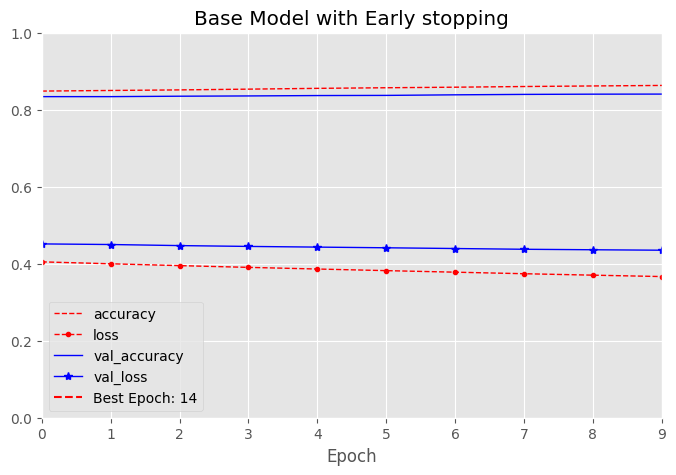

In [86]:
pd.DataFrame(history1.history).plot(
    figsize=(8, 5), xlim=[0, 9], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"],linewidth=1)
plt.plot(best_epoch_erstop,min(history1.history['val_loss']),"ro")
plt.vlines(best_epoch_erstop,0,min(history1.history['val_loss']), linestyle="--", color="red", label=f"Best Epoch: {best_epoch_erstop}",linewidth=1.5)
plt.legend(loc="lower left")
plt.title("Base Model with Early stopping")
plt.show()

3)

In [87]:
from tensorflow.keras.layers import BatchNormalization

In [88]:
model4 = Sequential([
        Flatten(input_shape=(14, 28)),  
        Dense(128, activation='relu',use_bias=False),
        BatchNormalization(),
        Dense(64, activation='relu',use_bias=False),
        BatchNormalization(),
        Dense(32,activation='relu',use_bias=False),
        BatchNormalization(),
        Dense(10, activation='softmax',use_bias=False)  
    ])

C:\Users\vagelis\anaconda3\envs\MLenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [89]:
model4.compile(optimizer=Adam(learning_rate=0.0001),  
                  loss='sparse_categorical_crossentropy',  
                  metrics=['accuracy'])

In [90]:
history2=model4.fit(X_train_upper, y_train, epochs=15, batch_size=32, validation_data=(X_valid_upper, y_valid))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.5854 - loss: 1.2805 - val_accuracy: 0.7833 - val_loss: 0.6453
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7727 - loss: 0.6719 - val_accuracy: 0.8060 - val_loss: 0.5521
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7961 - loss: 0.5811 - val_accuracy: 0.8170 - val_loss: 0.5160
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8108 - loss: 0.5324 - val_accuracy: 0.8204 - val_loss: 0.4973
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8200 - loss: 0.4986 - val_accuracy: 0.8207 - val_loss: 0.4900
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8305 - loss: 0.4723 - val_accuracy: 0.8250 - val_loss: 0.4816
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8386 - loss: 0.4513 - val_accuracy: 0.8237 - val_loss: 0.4772
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8446 - loss: 0.4332 -

In [91]:
model4_predictions=np.argmax(model4.predict(X_test_upper), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step    


In [92]:
cl_report_model4 = classification_report(y_test, model4_predictions,output_dict=True)

In [93]:
pd.DataFrame(cl_report_model4)

,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.774975,0.982030,0.715285,0.83237,0.723640,0.925049,0.551327,0.877395,0.953299,0.942105,0.824,0.827748,0.827748
recall,0.768000,0.929000,0.716000,0.86400,0.652000,0.938000,0.623000,0.916000,0.939000,0.895000,0.824,0.824000,0.824000
f1-score,0.771472,0.954779,0.715642,0.84789,0.685955,0.931480,0.584977,0.896282,0.946096,0.917949,0.824,0.825252,0.825252
support,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.824,10000.000000,10000.000000


In [94]:
best_epoch_batchnorm = np.argmin(history2.history['val_loss'])

In [95]:
best_epoch_batchnorm

9

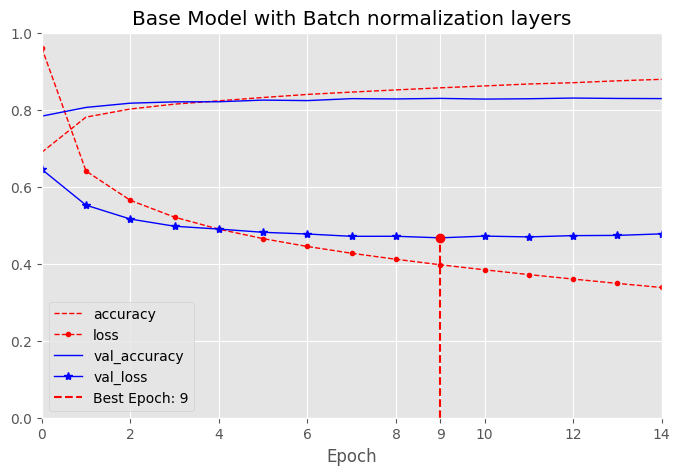

In [96]:
pd.DataFrame(history2.history).plot(
    figsize=(8, 5), xlim=[0, 14], ylim=[0, 1], grid=True, xlabel="Epoch",linewidth=1,
    style=["r--", "r--.", "b-", "b-*"])
plt.vlines(best_epoch_batchnorm,0,min(history2.history['val_loss']), linestyle="--", color="red", label=f"Best Epoch: {best_epoch_batchnorm}",linewidth=1.5)
plt.plot(best_epoch_batchnorm,min(history2.history['val_loss']),"ro")
plt.legend(loc="lower left")
plt.xticks([0,2,4,6,8,9,10,12,14])
plt.title("Base Model with Batch normalization layers")
plt.show()

4)

In [97]:
from tensorflow.keras.layers import Dropout

In [98]:
model5 = Sequential([
        Flatten(input_shape=(14, 28)),  
        Dense(128, activation='relu'),
        Dropout(rate=0.5),
        Dense(64, activation='relu'),
        Dropout(rate=0.5),
        Dense(32,activation='relu'),
        Dropout(rate=0.5),
        Dense(10, activation='softmax')  
    ])

C:\Users\vagelis\anaconda3\envs\MLenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [99]:
model5.compile(optimizer=Adam(learning_rate=0.0001),  
                  loss='sparse_categorical_crossentropy',  
                  metrics=['accuracy'])

In [100]:
history3=model5.fit(X_train_upper, y_train, epochs=15, batch_size=32, validation_data=(X_valid_upper, y_valid))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.1922 - loss: 2.1584 - val_accuracy: 0.5617 - val_loss: 1.3173
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4147 - loss: 1.5490 - val_accuracy: 0.6405 - val_loss: 1.0547
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4988 - loss: 1.3051 - val_accuracy: 0.7000 - val_loss: 0.8874
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5614 - loss: 1.1571 - val_accuracy: 0.7232 - val_loss: 0.7988
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6035 - loss: 1.0552 - val_accuracy: 0.7445 - val_loss: 0.7492
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6336 - loss: 0.9875 - val_accuracy: 0.7525 - val_loss: 0.7082
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6572 - loss: 0.9308 - val_accuracy: 0.7638 - val_loss: 0.6780
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6745 - loss: 0.8933 -

In [101]:
model5_predictions=np.argmax(model5.predict(X_test_upper), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step  


In [102]:
cl_report_model5 = classification_report(y_test, model5_predictions,output_dict=True)

In [103]:
pd.DataFrame(cl_report_model5)

,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.716472,0.967126,0.601059,0.803785,0.535077,0.936709,0.304933,0.886640,0.943340,0.872677,0.7755,0.756782,0.756782
recall,0.796000,0.912000,0.681000,0.807000,0.839000,0.888000,0.068000,0.876000,0.949000,0.939000,0.7755,0.775500,0.775500
f1-score,0.754145,0.938755,0.638537,0.805389,0.653427,0.911704,0.111202,0.881288,0.946162,0.904624,0.7755,0.754523,0.754523
support,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.7755,10000.000000,10000.000000


In [104]:
best_epoch_Dropout= np.argmin(history3.history['val_loss'])

In [105]:
best_epoch_Dropout

14

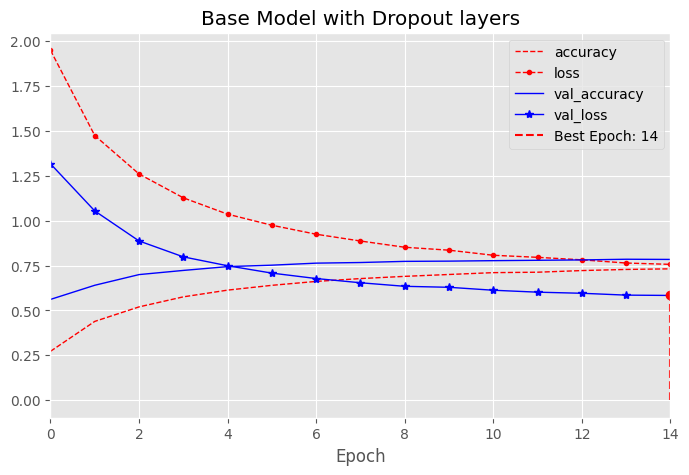

In [106]:
pd.DataFrame(history3.history).plot(figsize=(8, 5), xlim=[0, 14], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"],
                                   linewidth=1)
plt.vlines(best_epoch_Dropout,0,min(history3.history["val_loss"]),linewidth=1.5,linestyle="--",color="red",label=f"Best Epoch: {best_epoch_Dropout}")
plt.plot(best_epoch_Dropout,min(history3.history["val_loss"]),"ro")
plt.legend(loc="upper right")
plt.title("Base Model with Dropout layers")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1500x1500 with 0 Axes>

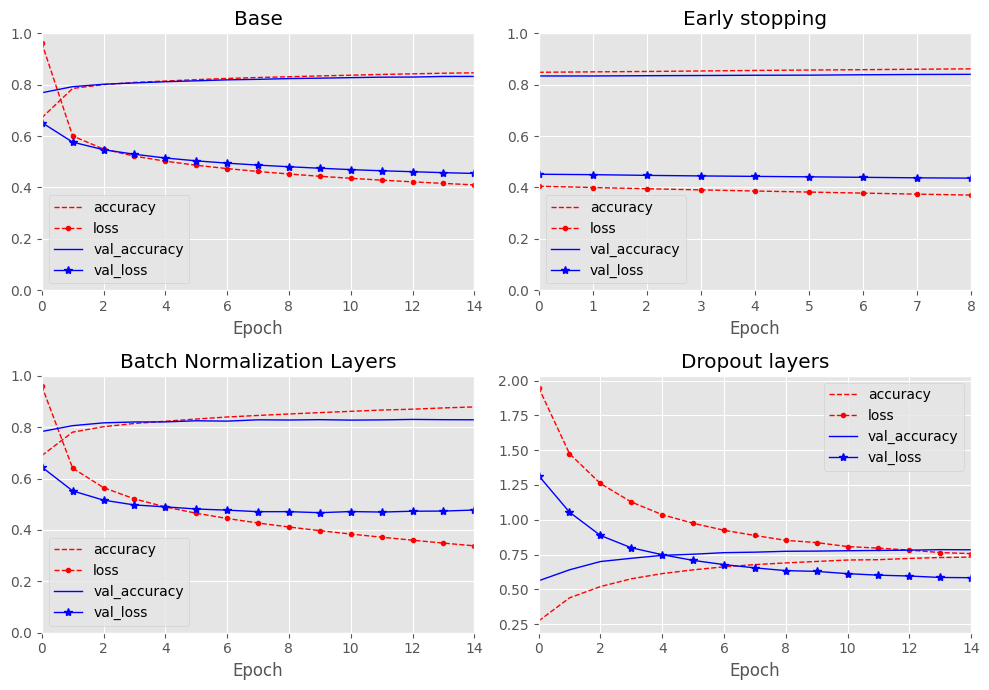

In [107]:
plt.figure(figsize=(15,15))
fig, axs = plt.subplots(2, 2)
pd.DataFrame(history.history).plot(figsize=(10, 7),ax=axs[0, 0], xlim=[0, 14], ylim=[0, 1], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"],
                                   title="Base",linewidth=1)
plt.legend(loc="lower left") 
plt.title("Base Model")
 
pd.DataFrame(history1.history).plot(
    figsize=(10, 7),ax=axs[0, 1], xlim=[0, 8], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"],linewidth=1,title="Early stopping")
plt.legend(loc="lower left")
plt.title("Base Model with Early stopping")

pd.DataFrame(history2.history).plot(
    figsize=(10, 7),ax=axs[1,0], xlim=[0, 14], ylim=[0, 1], grid=True, xlabel="Epoch",linewidth=1,
    style=["r--", "r--.", "b-", "b-*"],title="Batch Normalization Layers")
plt.legend(loc="lower left") 
plt.title("Base Model with Batch normalization layers")
  
pd.DataFrame(history3.history).plot(figsize=(10, 7),ax=axs[1,1],title="Dropout layers", xlim=[0, 14], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"],linewidth=1)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

As we can see from the aggregated graphs accuracy and validation accuracy are arroung the same levels in all models except dropout which is a bit lower.Validation loss and training loss follow a declining line during each epoch which is a good thing. The most stable model which keeps a high level of accuracy and a low level of loss through all the epochs is the model with early stopping. None of the models is overfitting because as we can see training and validation accuracy converge to the same levels over time.